# 1 True/False Questions (10 pts)
For each question, please provide a short explanation to support your judgment.

### Problem 1.1 (2 pts) 

Generally speaking, the weight pruning does not intervene the weight quantization, as they are orthogonal techniques in compress the size of DNN models.

> True, weight pruning and weight quantization are indeed orthogonal techniques. Pruning is done first, then quantization, and they do not interfere with each other and are actually quite effective in compressing models when used together. Using pruning to reduce the number of weights has no effect on weight quantization which is essentially using KNN to group weights and assign them an integer value.

### Problem 1.2 (2 pts) 

One practical way to achieve an efficient inference of a DNN model is to save potential multiplication results in a look-up table (LUT), as pruning greatly reduces the number of weight variables. As a result, pruning directly benefits the following Huffman coding process.

> False. It does not directly benefit huffman coding process, weight quantization is what directly benefits the huffman coding process as it converts the continuous distribution of weights to discrete numbers which can be used for huffman encoding. 

### Problem 1.3 (2 pts) 

Pruning removes (zeros) part of the weight parameters from the neural network models. When deploying on general hardware platforms (e.g., GPUs), these zeroed parameters don’t need to be computed during inference. Thus, we anticipate that training a pruned model on GPUs is much faster than training its original model.

> False, special hardware is required. GPUs still need to compute those 0s. In Han's paper "Learning both weights an connections for efficient neural network" a series of hardware designs are introduced to support the decompression work done by the authors of the paper.

### Problem 1.4 (2 pts) 

For a uniform distribution with cardinality N (random variables can be chosen from N values with equal probability), Huffman coding has an expected average code length of O(log(N)).

> True, all the encodings would be the same length. If the frequency is uniform, when we create a tree, all huffman encodings for variables will have to pass an equivalent number of nodes which is what generates the huffman encoding. If you have 8 variables with equal probability, we would expect to have an average huffman coding length of 0(log(8)), which is 3. Since huffman encodings are assigned from the last bit, the variables with the highest probability usually have the longest encodings, while the variables with the least probability have the shortest encodings. 

### Problem 1.5 (2 pts) 

Intuitively, k-bit quantization with K-means centroid requires Nk-bit storage for N weight variables.

> False. With k-bit quantization, weight values that have the same centroid are replaced with an index to which is related to a look-up table where centroid values are stored. Usually this changes weights, which are generally 32 bit floats, to cluster indicies which are k bits. The N elements with k clusters would change from $N \times$ $32$ bits to $N$ $\times$ $2 + k \times$ $32$ bits.

# 2   Lab 1: Pruning ResNet-20 without Retraining (26 pts)

ResNet-20 is a popular convolutional neural network (CNN) architecture for image classification. Compared to early CNN designs such as VGG-16, ResNet-20 is much more compact. Thus, conducing the model compression on ResNet-20 is more challenging.
Instead of using the provided data loader as in HW2, the official CIFAR-10 data loader from torchvision will be taken in HW 3. This ensures a fair comparison of the results of your compressed ResNet-20 model with others’, including the official results.

**(a)** (4 pts) Setting up the baseline is very important for deep learning. For the given ResNet-20 model, leverage your previous training experience to tune the hyperparameters. At this step, you should be able to obtain >91% accuracy for the given implementation.

> I was able to obtain a model with 0.914 accuracy. 
I used the following hyperparameters:
- Learning rate = 0.1, which decayed at 50 and 75 epochs
- Batch size = 128
- Regularization Strength = 1e-4

**(b)** (2 pts) Recall that in Lecture 11, we introduced two popular pruning methods: pruning by percentage and pruning by standard deviation. Conceptually, which method do you think is likely to yield better results? Explain why.

> Standard deviation takes into account what the distribution of the weights looks like. Percentile will discard the same amount of weights every time. Standard deviation is generally used when you want to achieve the best performance possible. If you goal is just to reach a certain sparsity, using percentile might be the better option as you know exactly what the sparsity will be after pruning. 

**(c)** (6pts) Please refer to pruned_layers.py to complete the implementation of standard deviation. This method determines the pruning threshold in each DNN layer using the standard deviation of the weight parameters with a given sensitivity s.

**(d)** (4 pts) Use the ‘prune’ function to find out how well pruning by standard deviation can do. Set and test a few values of the sensitivity parameter s = 0.0, 0.25, 0.50, and 1.0. Report the test accuracy and the sparsity of your pruned network for each s.
What do you observe from the sparsity pattern for each layer? E.g., is the sparsity structured or unstructured? Which layers are more likely to be sparse? etc. Give explanations to support your findings.

> The test accuracy and the sparsity of my network for each sensitivity parameter, s, is shown below. We notice an increase in sparsity as the sensitivity parameter increases. When pruning by standard deviation, I notice that the first convolutional layer has the most sparsity and the linear layer has the least. Therefore earlier layers are more likely to be more sparse (based on the output of the summary function which shows sparsity per layer). In general, sparsity tends to decrease in subsequent convolutional layers. 

>| s    | Sparsity | Test Accuracy |
|------|----------|----------|
| 0    | 0        | 0.914    |
| 0.25 | 0.2053   | 0.9082   |
| 0.5  | 0.3973   | 0.8748   |
| 1 | 0.6951   | 0.4718   |


>Below, I have summed the absolute values of the weights in the convolutional layers up. I randomly choose layer 1 and layer 13 to show. The plots before are from using a sensitivity parameter of 0.25 while using pruning by standard deviation. As can be seen, since none of the sums of weights are 0, we know that the sparsity in not structured. 

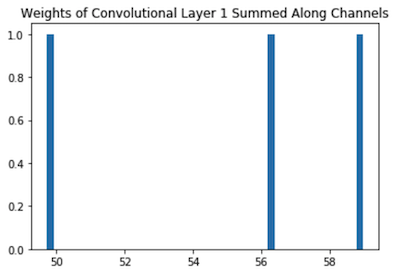

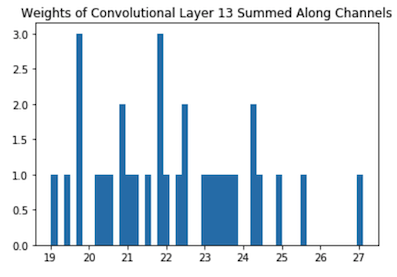

**(e)** (6 pts) Refer pruned_layers.py to complete the implementation of pruning by percentage. This method determines the pruning threshold in each DNN layer by the ‘q-th percentile’ value in the weight distribution.

**(f)** (4 pts) Again, use the ‘prune’ function to find out how well you did with both pruning by percentage. Try the following percentage values q = 0.0, 0.25, 0,5, 0.75. Report the test accuracy and the sparsity of your pruned network for each q. What can you observe from the sparsity pattern for each layer? Give explanations to support your findings.

> The test accuracy and the sparsity of my network for each q is shown below. Sparsity increases as q increases, as expected. When pruning by percentage, I notice that for all linear and convolution layers, the sparsity is equal to what I made the quantile hyperparameter (based on the output of the summary function which shows sparsity per layer).. This makes sense as we are eliminating weights under q percentile weights from the model (we set them to 0). 

>|q    | Sparsity | Test Accuracy |
|------|----------|----------|
| 0    | 0        | 0.914    |
| 0.25 | 0.25     | 0.9058   |
| 0.5  | 0.5      | 0.852   |
| 0.75 | 0.75   | 0.2367   |

>Below, I have summed the absolute values of the weights in the convolutional layers up. I randomly choose layer 1 and layer 13 to show. The plots before are from using a q of 0.25 while using pruning by percentage. As can be seen, since none of the sums of weights are 0, we know that the sparsity in not structured. 

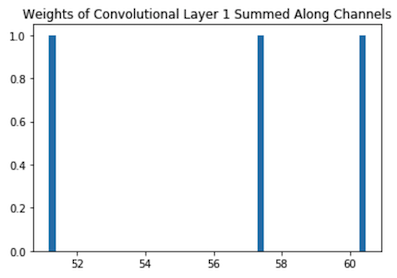

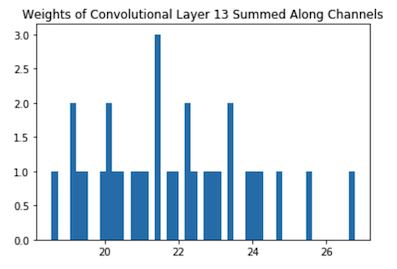

# 3 Lab 2: Pruning ResNet-20 with Retraining (24 pts)

Pruning a network without any retraining could result in accuracy loss, especially at a high compression rate. This lab introduces the retraining, which finetunes a pruned model to recovery the performance loss while maintaining its sparsity.

**(a)** (6 pts) Explain or illustrate the workflow/pipeline of retraining pruned models. Compared to the regular training pipelines in HW2 (our provided implementation), what additional components does this new pipeline contain?

> Compared to regular training pipelines, we need to create a mask for weights that are below the percentile or standard deviation threshold we have set. We use this mask, which contains 1 where weights are equal to or above threshold and 0 where weights are below, and multiply it by the graident to prevent weight updates to weights that are 0. This occurs for every batch that is input into the model for training. Doing this maintains sparsity and adjusts non-zero weights to recover performance. 

**(b)** (6 pts) Follow the workflow/pipeline in Part (a) to setup the retraining for pruned models in train_util.py. Note that you only need to fill in the finetune_after_prune function to complete this step.

**(c)** (6 pts) Use your implementation of retraining to recover the loss induced by pruning by standard deviation. Take the exactly same sensitivity parameters s = 0.0, 0.25, 0.50, and 1.0 as in Lab 1, and observe how the retraining recovers the model accuracy. Please report the test accuracy before/after retraining, the model sparsity, and your retraining settings. Provide intuitive explanations. (Hint: Retraining for 20 epochs should be sufficient for recovering the accuracy induced by pruning by standard deviation).

>The retraining hyperparmaeters I used were:
- Learning Rate: 0.001
- Batch Size: 128
- l2 Regularization Strength: 1e-4
- Epochs: 20

> I decided to use a low learning rate because the model had been previously trained meaning that it would not require much more training to reach a high performance. This is because weights that were the least important (lowest in magnitude) were set to zero and the model would likely just need to adjust the non-zero weights slightly to account for this change. I decided to use the same batch size and regularization strength as in my initial training as keep most hyperparameters the same as when I first trained the model. I did this because these were the optimal hyperparameters previously and I felt that it would give my model the best chance to recover. I used 20 epochs because I felt as this was sufficient to recover accuracy. 

>The test accuracy before and after retraining is located in the table below.

>| s    | Sparsity | Test Accuracy before Retraining | Test Accuracy after Retraining
|------|----------|----------|----------|
| 0    | 0        | 0.914    |0.914|
| 0.25 | 0.2053   | 0.9082   |0.9136|
| 0.5  | 0.3973   | 0.8748   |0.911|
| 1 | 0.6951   | 0.4718   |0.894|

**(d)** (6 pts) Similarly, use your implementation of retraining to recover the loss induced by pruning by percentage. Take the exactly same percentage values q = 0.0, 0.25, 0,5, 0.75 as in Lab 1, and see how the retraining recovers your model accuracy. Report the test accuracy before/after retraining, model sparsity, and your retraining settings. Explain your observations intuitively. (Hint: Retraining for 20 epochs should be sufficient for recovering the accuracy induced by pruning by percentage).

>The retraining hyperparmaeters I used were:
- Learning Rate: 0.001
- Batch Size: 128
- l2 Regularization Strength: 1e-4
- Epochs: 20

> I decided to use a low learning rate because the model had been previously trained meaning that it would not require much more training to reach a high performance. This is because weights that were the least important (lowest in magnitude) were set to zero and the model would likely just need to adjust the non-zero weights slightly to account for this change. I decided to use the same batch size and regularization strength as in my initial training to keep most hyperparameters the same as when I first trained the model. I did this because these were the optimal hyperparameters previously and I felt that it would give my model the best chance to recover. I used 20 epochs because I felt as this was sufficient to recover accuracy. 

>The test accuracy before and after retraining is located in the table below.

>| q    | Sparsity | Test Accuracy before Retraining| Test Accuracy after Retraining
|------|----------|----------|----------|
| 0    | 0        | 0.914    |0.9138|
| 0.25 | 0.25     | 0.9058   |0.9137|
| 0.5  | 0.5      | 0.852   |0.9105|
| 0.75 | 0.75   | 0.2367   |0.8837|


# 4     Lab 3: Quantization & Huffman coding (18 pts)

Quantization can further compress models by reducing the bit precision of weight parameters. A type of quantization is weight clustering, which searches for a number of clusters to approximate weight param- eters. To further compress weights, we use Huffman coding after applying quantization.

**(a)** (6 pts) Implement the quantization (weight sharing) method by using K-means as the clustering method in quantize.py. Here, you can define a quantization bit, and the quantization will retrieve a set of weight clusters to approximate the weight parameters for each layer.

**(b)** (4 pts) Plot and compare the weight distributions before and after applying the quantization.

>Quantization before and after quantization for the first convolutional layer and the last layer, which is the fully connected layer, is shown below. We notice that before quantization, the weights values are continuous. After quantization, the weights are discrete. This is clear by the amount of space we see in the after quantization plots comapred the the before quantization plots. This indicates that quantization worked correctly.



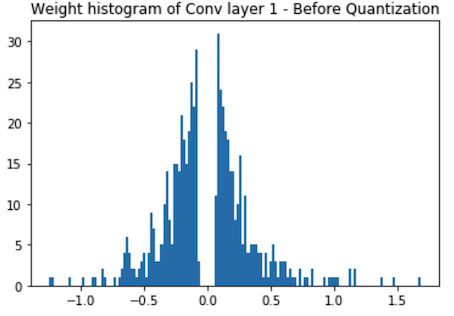

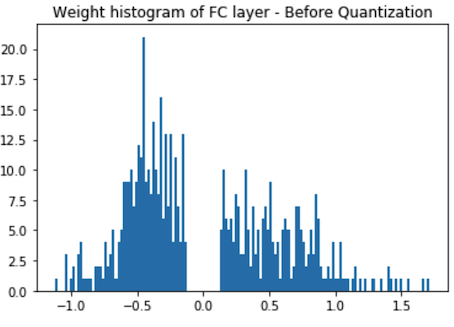

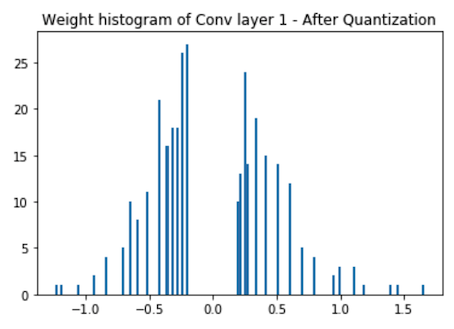

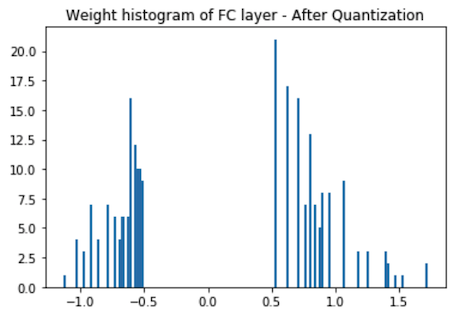

**(c)** (4 pts) Try more quantization bits: 6, 5, 4, 3 to see how quantization affects the test accuracy. According to your results, what is the optimal quantization bit with the best trade-off between memory consumption and model performance in this example? Briefly describe your findings and explain why.

>Here we notice that there is almost no difference in our model performance when using 5 and 6 quantization bits. When we use 4 quantization bits, we see the model performance slightly decrease. When we use 3 bits we see the performance begin to drop off more rapidly. This is because when we have 3 bits, we only have 8 indices for our look up tables. When we have 4 bits we can store 16 incides for our look up tables. Clearly as we increase the number of bits the numbers of values weights can possibly be increases. As we increase compression (decrease quantization bits), we decrease of centroid values which are shared. Less compression means less weight sharing which allows weights to have more precision. Therefore too much compression can lead to a loss accuracy. 

>|Quantization bits| Test Accuracy |
|------|----------|
| 3    | 0.8639   | 
| 4    | 0.9036   | 
| 5    | 0.9121   | 
| 6    | 0.912    | 

**(d)** (Bonus, 5 pts) By default, the linear initialization is adopted to initialize K-means clusters. Try other initialization approaches in Lecture 11 and report the results on the test dataset. According to your investigation, what is the best way of initializing the K-means centroid? Briefly describe your findings.

> I tried using the KMeans++, linear, and random initialization. I found that Kmeans++ initialization had the best model performance followed closely by linear. Random initialization was lower but not by a large amount. The best way to initiate K-mean cetroids appears to be Kmeans++ based on my testing but more testing is needed to determine if KMeans++ is truly better than linear. Linear and Kmeans++ likely performed better than random as they take the values of the weights into consideration while random initialization does not. One thing that I did notice was that my quantization was a lot faster when I used linear initialization. 

>|Initialization Method| Test Accuracy |
|------|----------|
|Linear     | 0.9133 | 
|Kmeans++     |0.9135  | 
|Random    | 0.9121  | 

**(e)** (4 pts) Implement Huffman coding in huffman_coding.py to transform weight parameters in each layer into variable-length encoding. When taking 5 bits for quantization, what is the average bit length for the weight parameters with Huffman encoding?

> When taking 5 bits for quantization, the average bit length for the weight parameters with Huffman encoding was approximately 4.2874 bits.

# 5 Lab 4: Putting All Together (22 pts)

The model compression rate in the deep compression scheme so far can be formulated as follows:

$$ratio = \frac{nonzero\_params}{total\_params} \times \frac{quant\_bits}{32} \times \frac{huffman\_length}{original\_length}$$

Where **nonzero_params** denotes the number of non-zero weight parameters, **total_params** indicates the total number of weight parameters, **quant_bits** is the quantization bits, **huffman_length** represents the average Huffman encoding length of the clustered weight variables, and **orginal_length** indicates the encoding length of weight variables before Huffman coding (i.e., equal to **quant_bits**).

(22 pts) By applying the pruning, quantization and Huffman coding pipeline, we aim to compress the model by a compression rate of ≥ 20×, with < 1% accuracy loss. Additional techniques (e.g., iterative pruning) might be needed to reach this target. The baseline accuracy for this model is about 91%. So your submission should achieve at least 90% test accuracy on the CIFAR-10 test dataset.

> I was able to achieve an accuracy of 0.9119 using itterative percentage pruning. My pipeline is as follows:

>|Method|q|Epochs|Batch Size|Learning Rate| Regularization Strength
|:-:|:-:|:-:|-:-:|:-:|:-:|
|Prune|0.5 | | | | | | 
|Finetune| |10 |128 |0.001 |1e-4 | | 
|Prune|0.6 | | | | | | 
|Finetune| |10 |128 |0.001  |1e-4 | | 
|Prune|0.64 | | | | | | 
|Finetune| |10 |128 |0.001  |1e-4 | | 

>Quantization: 5 bits

>Huffman Encoding: 5 bits to 4.298 bits

>Compression: 

>$$ratio = 0.36 \text{ nonzero_params} \times \frac{5\text{ quant bits}}{32} \times \frac{4.298 \text{ Huffman average length}}{5 \text{ bits}}$$

>$$ratio = 0.048375$$

>$$= \frac{1}{0.048375} = 20.67$$

>$$\boxed{Model\_Compression = 20.67}$$
$$\boxed{Accuracy = 90.19\%}$$